# Week 1 lecture notes

From Coursera Applied Machine Learning in Python.

**Module 1: Fundamentals of Machine Learning- Intro to SciKit Learn**

This week:

* What machine learning is, why it is important
* How it is applied
* Set up first machine learning problem

## What is machine learning?

Not all problems lend themselves to being solved by writing a custom algorithm. Machine learning provides a technology to automatically learn rules in a way that is more flexible than programming rules by hand. 

The question: How can a computer program *itself* to complete a task?

## This course's goal

High level understanding of how to apply machine learning algorithms and interpret their results.

# Key concepts in Machine Learning

Two main types:

* Supervised machine learning: Learn to predict target values from labeled data. Requires labeled data, typically provided by human labelers, sometimes by crowd sourcing platforms. 
    * Classificiation (target values are discrete classes)
    * Regression (target values are continuous values)
* Unsupervised machine learning: Find structure in *unlabeled data*
    * Find groups of similar instances in the data (clustering)
    * Find unusual patterns (outlier detection)
    
## A basic machine learning workflow:

Representation --> Evaluation <--> Optimization

*Representation:*  Choose a feature representation, type of classifier to use. Ex: Image pixels, with k-nearest neighbor classifier.  
*Evaluation:* Choose what criterion distinguishes good vs. bad classifiers. Ex: % correct predictions on test set.  
*Optimization:* Choose how to search for the settings/parametres that give the best classifier for this evaluation criterion. Ex: Try a range of values for "k" parameter in k-nearest neighbor classifier.  

Often an iterative process

* Make a guess on which features are important, what classifier to use, run it
* Do an analysis to see where the system is failing
* Evaluate failures, may discover some features that are missing

You may do several iterations on this

## Python tools for machine learning

`scikit-learn` will be used for this course. It's the most widely-used library and has many examples online. 

User guide: https://scikit-learn.org/stable/user_guide.html

# First example: Object recognition









In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('course3_downloads/fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


The `color_score` is a value from 0 to 1, corresponding to a position along the jet colorbar.

The goal: Predict which fruit you have based on the dimensions and `color_score`.

In [3]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Split the dataset into train and test sets

Into a training set and a test set.

Scikit-learn provides a handy function called train-test split. It randomly shuffles the dataset and splits it up.

The default test size is 0.25. 

**Denote data with different flavors of capital "X".**

**Labels based on lowercase "y".**

If you want to get the same splits, pass in the same `random_state` value.

In [4]:
X = fruits[['mass','width','height','color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

## Visualize the data

Feature pair plot

<IPython.core.display.Javascript object>


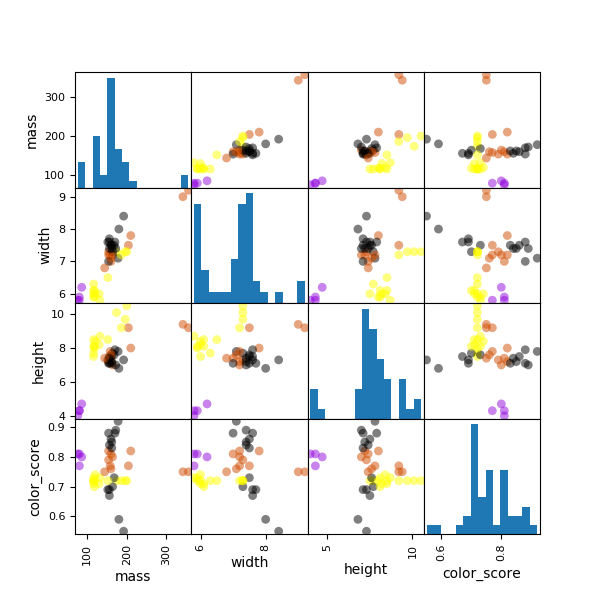

In [5]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker='o',s=40,hist_kwds={'bins':15},figsize=(6,6),cmap=cmap)

Create a 3D plot.

<IPython.core.display.Javascript object>


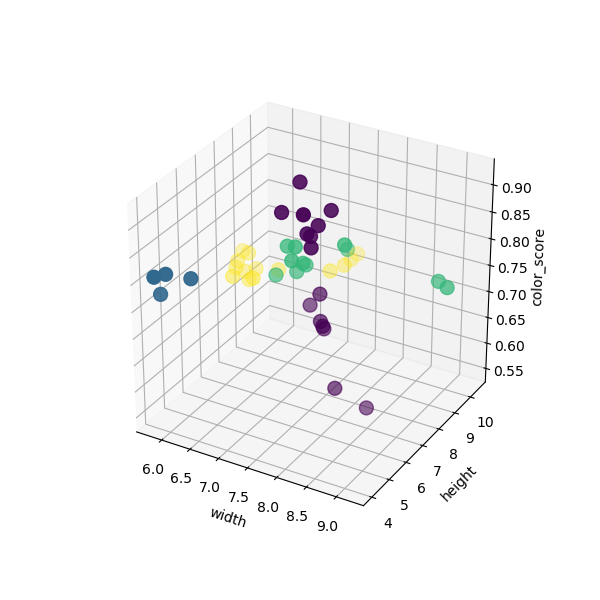

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_train['width'],X_train['height'],X_train['color_score'],c=y_train,marker='o',s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

## What is k-nearest neighbors (KNN) ML algorithm

k-NN can be used for classification and regression. Here we will use it for classification. k-NN are an example of instance-based or memory-based supervised learning: The method memorizes the labeled examples that it sees in the training set, and then uses those memorized examples to classify new objects later.

The "k" in k-NN refers to the number of nearest neighbors the classifier will retrieve and use in order to make its prediction. 

Three steps that a k-NN classifier follows when given a new previously unseen instance of something to classify:

1) Look into its memorized training examples to find the k examples that have closest features. Call these `X_NN`.  
2) Look up the class labels for those k-NN examples, call these `y_NN`.  
3) Combine the labels of those examples to make a prediction for the label of the new object. (typically by using the majority)

With a k=1 decision, you're simply finding the nearest point. I'm going to try it with the width and height parameters. 

A nearest neighbor algorithm needs four things specified:

1) A distance metric... typically Euclidean  
2) How many 'nearest' neighbors to look at? e.g. 5  
3) Optional weighting function on the neighbor points. In this case: ignored  
4) Method for aggregating the classes of neighbor points. Ex: Simple majority  



## Try coding it from scratch

First make a plot of the width and height values on their own, by label.

In [7]:
labels = fruits['fruit_name'].unique()

In [8]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


<IPython.core.display.Javascript object>


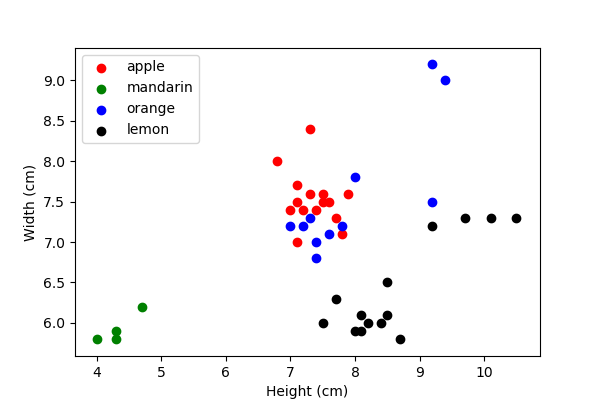

In [10]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

labels = ['apple','mandarin','orange','lemon']
label_code = [1,2,3,4]
colors = ['r','g','b','k']
fruit_indices = [0,1,2,3]

for i in fruit_indices:
    label = label_code[i]
    
    mask = y_train == label
    x = X_train[mask]['height']
    y = X_train[mask]['width']

    ax.scatter(x,y,c=colors[i])
    
ax.legend([l for l in labels])
ax.set_ylabel('Width (cm)')
ax.set_xlabel('Height (cm)')
plt.show()

I'm going to brute force this.... make a bunch of indices at which to find the nearest label. 

In [11]:
h = np.arange(4,11,.1);
w = np.arange(5.5,10,.1);
grid_h, grid_w = np.meshgrid(h,w)

In [12]:
print('h:', h.shape)
print('w:', w.shape)
print('grid_h:', grid_h.shape)
print('grid_w:', grid_w.shape)

h: (70,)
w: (45,)
grid_h: (45, 70)
grid_w: (45, 70)


In [13]:
def find_label(h_here,w_here,X_trainer,y_train):
    
    X_train = X_trainer.copy()
    X_train['distance'] = np.nan
    
    for index, row in X_train.iterrows():
        h_row = row['height']
        w_row = row['width']
        
        X_train.loc[index,'distance'] = np.sqrt((h_row-h_here)**2+
                                                (w_row-w_here)**2)
    
    index_min = X_train['distance'].idxmin()    
    label = y_train[index_min]
    
    return label

In [14]:
find_label(5,5,X_train,y_train)

2

In [15]:
columns = ['h','w','label_guess']
df_search = pd.DataFrame(columns = columns)
df_search

master_i = 0

for w_i in range(len(w)):
    for h_i in range(len(h)):
        h_here = grid_h[w_i,h_i]
        w_here = grid_w[w_i,h_i]
        
        df_search.loc[master_i,'h'] = h_here
        df_search.loc[master_i,'w'] = w_here
        
        df_search.loc[master_i,'label_guess'] = find_label(h_here,w_here,X_train,y_train)
        
        master_i += 1
        
df_search.head()

,h,w,label_guess
0,4,5.5,2
1,4.1,5.5,2
2,4.2,5.5,2
3,4.3,5.5,2
4,4.4,5.5,2


<IPython.core.display.Javascript object>


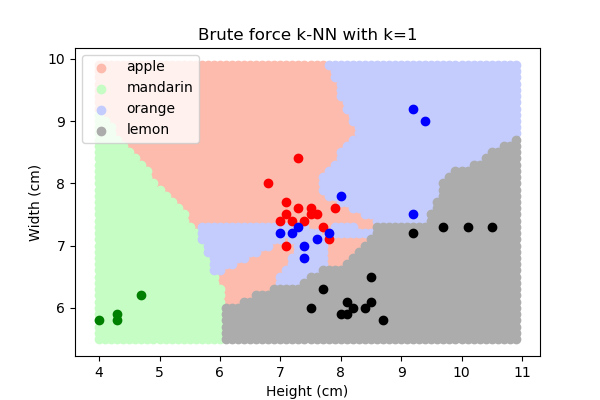

In [17]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

labels = ['apple','mandarin','orange','lemon']
label_code = [1,2,3,4]
colors_knn = ['#FCBBAD','#C6FDC4','#C4CCFD','#ACACAC']
colors = ['r','g','b','k']
fruit_indices = [0,1,2,3]

for i in fruit_indices:
    label = label_code[i]
    
    # k-NN map
    mask = df_search['label_guess'] == label
    x = df_search[mask]['h']
    y = df_search[mask]['w']
    
    ax.scatter(x,y,c=colors_knn[i])
    
    
for i in fruit_indices:    
    label = label_code[i]
    
    mask = y_train == label
    x = X_train[mask]['height']
    y = X_train[mask]['width']

    ax.scatter(x,y,c=colors[i])

ax.legend([l for l in labels])
ax.set_ylabel('Width (cm)')
ax.set_xlabel('Height (cm)')
plt.title('Brute force k-NN with k=1')
plt.show()

## Perform the k-NN with scikit-learn

Create classifier object.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

Train the classifier (fit the estimator) using the training data

I'm just going to use the dimensions for this.

In [29]:
X = fruits[['mass','width','height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [30]:
X_train.head()

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0


In [31]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Estimate the accuracy of the classifier on future data, using the test data

In [32]:
knn.score(X_test,y_test)

0.5333333333333333

Use the trained k-NN classifier model to classify new, previously unseen objects

In [38]:
lookup_fruit_name[knn.predict([[20,4.3,5.5]])[0]]

'mandarin'

In [39]:
lookup_fruit_name[knn.predict([[100,6.3,8.5]])[0]]

'lemon'

Plot the decision boundaries of the k-NN classifier

In [41]:
import sys
sys.path.append('course3_downloads/')
from adspy_shared_utilities import plot_fruit_knn

course3_downloads\adspy_shared_utilities.py:172: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
course3_downloads\adspy_shared_utilities.py:173: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


<IPython.core.display.Javascript object>


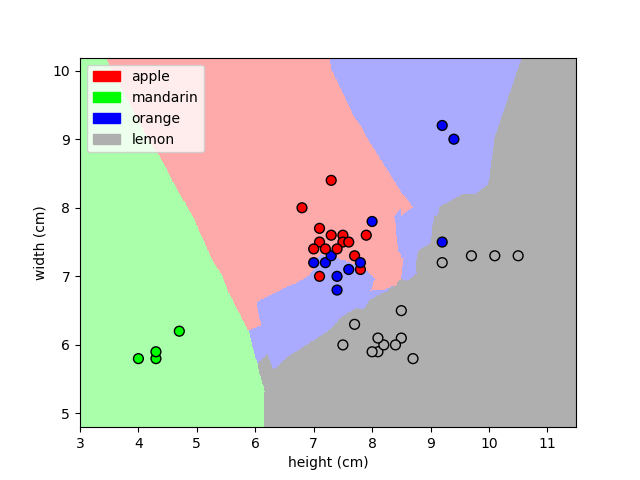

In [42]:
plot_fruit_knn(X_train,y_train,5,'uniform')

How does the choice of k affect the accuracy of the classifier?

<IPython.core.display.Javascript object>


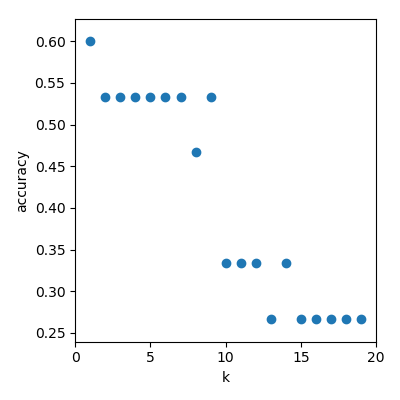

In [47]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
    
plt.figure(figsize=(4,4))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20])
plt.tight_layout()
plt.show()